This notebook tests out a tool for extracting a constellation of stars from Gaia DR2, and displaying them as a finder chart. 

In [1]:
from craftroom.thefriendlystars.constellation import *

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


First, let's use Simbad to pull up some star by its name, to set the center for our finder chart.

In [2]:
# define the center of the search
center = get('GJ 1132')
print(center)

<SkyCoord (ICRS): (ra, dec) in deg
    (153.7162271, -47.1568464)>


Next, let's pull out the stars within 3 arcminutes of this center, and down to 20th magnitude.

In [3]:
# get constellation of stars surrounding that one
g = Gaia(center, radius=3*u.arcmin, magnitudelimit=20)

         [gaia] querying Gaia DR2, centered on <SkyCoord (ICRS): (ra, dec) in deg
                    (153.7162271, -47.1568464)> with radius 3.0 arcmin, for G<20
         [gaia] SELECT source_id,ra,ra_error,dec,dec_error,pmra, pmra_error, pmdec, pmdec_error, parallax, parallax_error, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, radial_velocity, radial_velocity_error, phot_variable_flag, teff_val, a_g_val FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',153.7162271,-47.1568464,0.05))=1 and phot_g_mean_mag < 20
         [gaia] Gaia contains 374 objects


This gives us access to all the Gaia DR2 stars through the `objects` attribute.

In [4]:
g.objects.ra[0], g.objects.dec[0], g.objects.pm_ra_cosdec[0], g.objects.pm_dec[0]

(<Longitude 153.68605688 deg>,
 <Latitude -47.17713271 deg>,
 <Quantity -5.0607605 mas / yr>,
 <Quantity 2.31248653 mas / yr>)

Let's make a plot!

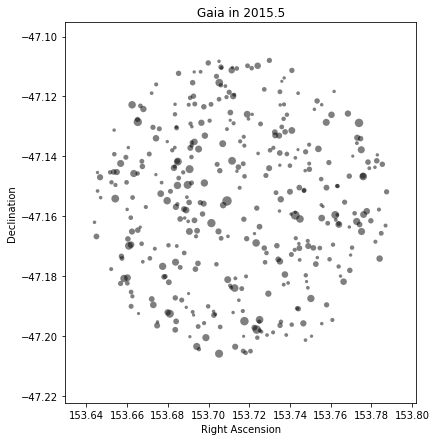

In [5]:
%matplotlib inline
g.finder();

Let's animate it!

100%|██████████| 41/41 [00:02<00:00, 17.27it/s]


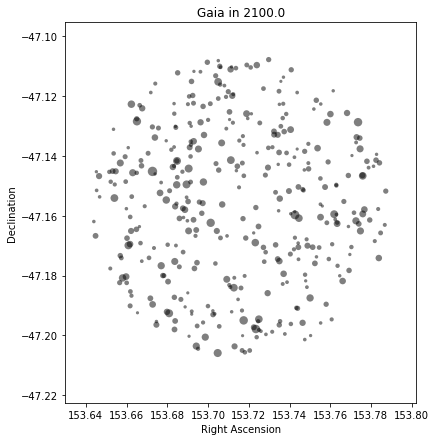

In [6]:
g.animate()

In [6]:
!open constellation.mp4